<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>BESLISSINGSBOOM: ZONNECREME</h1>    
    </font>
</div>

Van acht personen wordt nagegaan of ze bij het zonnebaden zijn verbrand. Ze zonden tegelijkertijd, even lang en op dezelfde plaats.<br>
Van elk van hen wordt in een tabel de haarkleur, de lengte en gewicht genoteerd, en of ze hun huid hebben beschermd door het smeren van een bepaalde zonnecrème.<br>
Stel op basis van deze dataset een beslissingsboom op die voor een persoon die niet in de dataset voorkomt, aangeeft of die persoon (onder dezelfde omstandigheden) zou verbranden of niet.


<table>
 <thead>
    <tr>
      <th><p align="center">Naam</th>  
      <th><p align="center">Haarkleur</th>
      <th><p align="center">Lengte</th>
      <th><p align="center">Gewicht</th> 
      <th><p align="center">Zonnecrème</th> 
      <th><p align="center">Klasse</th> 
  </thead>
   <tr> <td> <p align="left">Laura           
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; blond   
        <td> <p align="center">&nbsp;&nbsp;gemiddeld 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;licht    
        <td> <p align="left">&nbsp;&nbsp;&nbsp; nee  
        <td> <p align="left">&nbsp;&nbsp;&nbsp; verbrand      
   <tr> <td> <p align="left">Thomas            
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; blond   
        <td> <p align="center">&nbsp;&nbsp;groot 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;gemiddeld   
        <td> <p align="left">&nbsp;&nbsp;&nbsp; ja  
        <td> <p align="left">&nbsp;&nbsp;&nbsp; niet verbrand      
   <tr> <td> <p align="left">Aline           
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; bruin   
        <td> <p align="center">&nbsp;&nbsp;klein 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;gemiddeld   
        <td> <p align="left">&nbsp;&nbsp;&nbsp; ja  
        <td> <p align="left">&nbsp;&nbsp;&nbsp; niet verbrand      
   <tr> <td> <p align="left">Katrien  
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; blond   
        <td> <p align="center">&nbsp;&nbsp;klein
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;gemiddeld   
        <td> <p align="left">&nbsp;&nbsp;&nbsp; nee
        <td> <p align="left">&nbsp;&nbsp;&nbsp; verbrand  
   <tr> <td> <p align="left">Jarne 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; rood                                   
        <td> <p align="center">&nbsp;&nbsp;gemiddeld 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;licht          
        <td> <p align="left">&nbsp;&nbsp;&nbsp; nee  
        <td> <p align="left">&nbsp;&nbsp;&nbsp; verbrand  
   <tr> <td> <p align="left">Sofie          
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; bruin              
        <td> <p align="center">&nbsp;&nbsp;groot 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;zwaar                 
        <td> <p align="left">&nbsp;&nbsp;&nbsp; nee    
        <td> <p align="left">&nbsp;&nbsp;&nbsp; niet verbrand  
   <tr> <td> <p align="left">James          
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; bruin              
        <td> <p align="center">&nbsp;&nbsp;gemiddeld 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;zwaar  
        <td> <p align="left">&nbsp;&nbsp;&nbsp; nee    
        <td> <p align="left">&nbsp;&nbsp;&nbsp; niet verbrand 
   <tr> <td> <p align="left">Emiel          
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; blond           
        <td> <p align="center">&nbsp;&nbsp;klein 
        <td> <p align="center">&nbsp;&nbsp;&nbsp;&nbsp;licht          
        <td> <p align="left">&nbsp;&nbsp;&nbsp; ja  
        <td> <p align="left">&nbsp;&nbsp;&nbsp; niet verbrand  
</table>
            
Bron: https://www.kaggle.com/sanikabhagat/kyphosis-prediction-using-dec-trees-rndm-forest          TODO

### Voorbeeldoplossing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree

In [2]:
# beschouwde parameters zijn 'haarkleur', 'lengte', 'gewicht' en 'zonnecrème'
# alle parameters zijn categorisch, dus we zetten ze om naar numerieke 
# haarkleur bruin is '0'. blond is '1' en rood is '2'
# klein is '0', gemiddelde lengte is '1' en groot is '2'
# licht is '0', gemiddeld is '1' en zwaar is '2'
# geen zonnecrème is '0', wel zonnecrème is '1' 
# waarden van deze parameters staan in resp. kolom 0, 1, 2, 3 van matrix data
# elke rij komt overeen met één zonnebader
# laatste kolom geeft of persoon verbrandt ('1') of niet ('0').
data = np.array(
      [[1, 1, 0, 0, 1],
       [1, 2, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [2, 1, 0, 0, 1],
       [0, 2, 2, 0, 0],
       [0, 1, 2, 0, 0],
       [1, 0, 0, 1, 0]])

In [3]:
# parameters en klasse onderscheiden
parameters = data[:, :4]        # eerste 4 kolommen van matrix zijn beschouwde parameters
klasse = data[:, 4]             # laatste kolom zijn klasse waartoe persoon behoort

In [4]:
print(parameters)

[[1 1 0 0]
 [1 2 1 1]
 [0 0 1 1]
 [1 0 1 0]
 [2 1 0 0]
 [0 2 2 0]
 [0 1 2 0]
 [1 0 0 1]]


In [5]:
print(klasse)

[1 0 0 1 1 0 0 0]


In [6]:
# beslissingsboom genereren op basis van data
beslissingsboom = tree.DecisionTreeClassifier(criterion="gini")   # boom wordt aangemaakt via gini-index
beslissingsboom.fit(parameters, klasse)                           # boom genereren die overeenkomt met data

DecisionTreeClassifier()

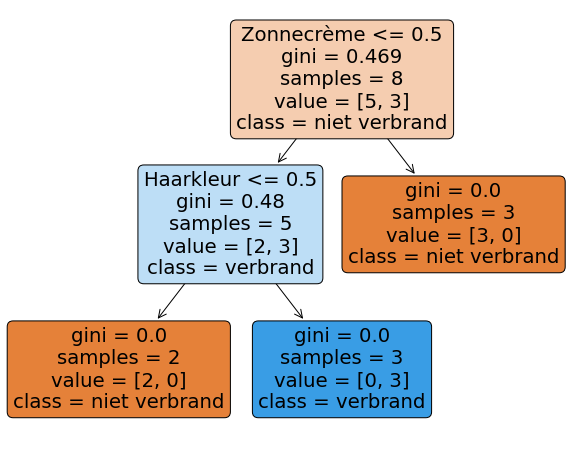

In [7]:
plt.figure(figsize=(10,8))  
tree.plot_tree(beslissingsboom, 
               class_names=["niet verbrand", "verbrand"], 
               feature_names=["Haarkleur", "Lengte", "Gewicht", "Zonnecrème"], 
               filled=True, rounded=True)
plt.show()

### Referenties

University of Birmingham. Worksheet for Decision Tree Learning. (2012-2013).<br>
&nbsp; &nbsp; &nbsp; &nbsp; https://www.studocu.com/en-gb/document/university-of-birmingham/machine-learning-extended/worksheet-decision-tree-learning/643682

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook AI in de Zorg, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 